In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_altered = df_original.copy()

In [2]:
df_altered = df_altered[df_altered['job_title_short']=='Data Analyst']
df_explode = df_altered.explode('job_skills')

In [3]:
skill_stats = df_explode.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

In [4]:
skill_stats = skill_stats.sort_values('skill_count', ascending=False).head(10)

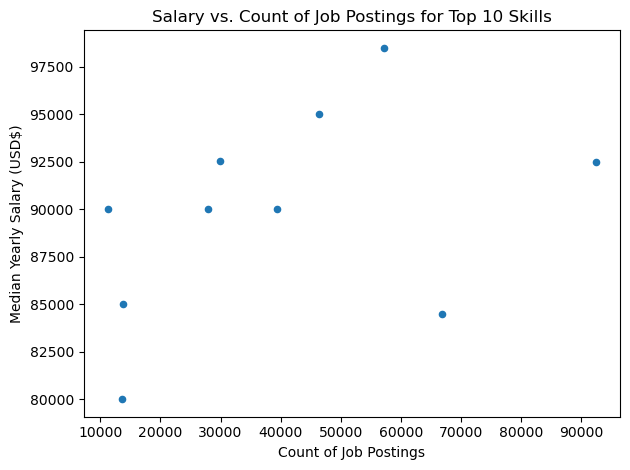

In [23]:
skill_stats.plot(kind='scatter', x='skill_count', y = 'median_salary')
plt.xlabel('Count of Job Postings') 
plt.ylabel('Median Yearly Salary (USD$)') 
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout() 
plt.show()

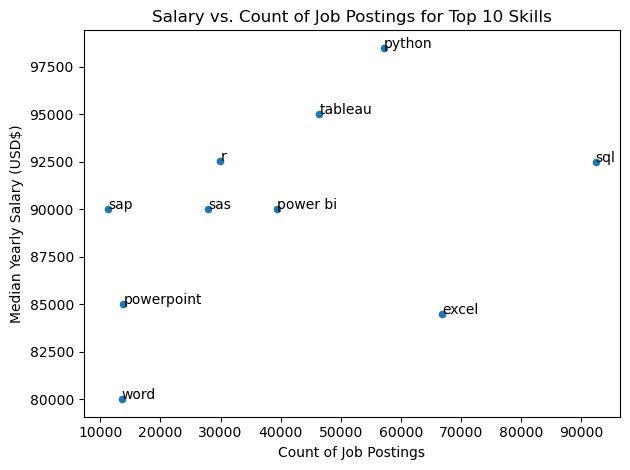

In [31]:
skill_stats.plot(kind='scatter', x='skill_count', y = 'median_salary')
plt.xlabel('Count of Job Postings') 
plt.ylabel('Median Yearly Salary (USD$)') 
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout() 
for i, txt in enumerate(skill_stats.index): 
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt) 
plt.show()